# پروژه طبقه‌بندی اخبار با Multinomial Naive Bayes
این نوت‌بوک یک **پایپلاین کامل برای طبقه‌بندی متن اخبار** ارائه می‌دهد.  
الگوریتم استفاده شده: **Multinomial Naive Bayes** با بردارسازی متن با **CountVectorizer**.  

مراحل انجام پروژه:  
1. وارد کردن کتابخانه‌ها  
2. بارگذاری داده‌ها  
3. نمونه‌گیری استراتیفای شده  
4. آماده‌سازی ویژگی‌ها و برچسب‌ها  
5. بردارسازی متن  
6. آموزش مدل  
7. پیش‌بینی  
8. محاسبه معیارهای ارزیابی  
9. نمایش ماتریس سردرگمی  
10. نمودار مقایسه معیارها  
11. پیش‌بینی متن دلخواه


# بارگذاری کتابخانه ها
در این بخش، تمام کتابخانه‌های مورد نیاز برای پروژه وارد می‌شوند.

pandas و numpy برای مدیریت داده‌ها و محاسبات عددی استفاده می‌شوند.

matplotlib و seaborn برای رسم نمودارها، و sklearn برای بردارسازی متن، مدل Naive Bayes و محاسبه معیارهای ارزیابی کاربرد دارند.

In [15]:

import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt  
import seaborn as sns            

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB               
from sklearn.metrics import (                               
    accuracy_score,   
    precision_score,
    recall_score,      
    f1_score,          
    classification_report,  
    confusion_matrix       
)


## بارگذاری داده‌ها
در این بخش، دیتاست آموزش و تست را از فایل CSV می‌خوانیم.  
همچنین شکل داده‌ها و چند نمونه اول بررسی می‌شود.


In [3]:

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Sample rows:\n", train_df.head())


Train shape: (120000, 2)
Test shape: (7600, 2)
Sample rows:
                                                 text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2


## نمونه‌گیری استراتیفای شده (Stratified Subsample)
برای سریع‌تر شدن آموزش، تعداد نمونه‌ها محدود می‌شود اما نسبت کلاس‌ها حفظ می‌شود.  
- 5000 نمونه از هر کلاس برای آموزش  
- 1000 نمونه از هر کلاس برای تست


In [ ]:

train_df = train_df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(min(5000, len(x)), random_state=42)
)
test_df = test_df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(min(1000, len(x)), random_state=42)
)

print("Subsampled Train:", train_df.shape)
print("Subsampled Test:", test_df.shape)


## آماده‌سازی ویژگی‌ها و برچسب‌ها
ستون متن‌ها به عنوان ورودی (X) و ستون برچسب‌ها به عنوان خروجی (y) تعریف می‌شوند.


In [5]:

X_train = train_df["text"]
y_train = train_df["label"]
X_test = test_df["text"]
y_test = test_df["label"]


## بردارسازی متن
متن‌ها به یک بردار عددی تبدیل می‌شوند تا مدل Naive Bayes بتواند از آن‌ها استفاده کند.


In [6]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## آموزش مدل


In [7]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)
print("Model training finished.")


Model training finished.


## پیش‌بینی روی داده‌های تست
- پیش‌بینی کلاس‌ها  
- پیش‌بینی احتمال تعلق هر متن به هر کلاس


In [9]:
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)
print("Prediction done.")


Prediction done.


## محاسبه معیارهای ارزیابی
- Accuracy: درصد پیش‌بینی درست  
- Precision: دقت پیش‌بینی‌های مثبت  
- Recall: حساسیت مدل  
- F1-score: ترکیبی از Precision و Recall


In [10]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("\nEvaluation Metrics:")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics:
Accuracy : 0.8995
Precision: 0.8993429511091425
Recall   : 0.8995
F1-score : 0.8993781805271808

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1000
           1       0.95      0.97      0.96      1000
           2       0.86      0.86      0.86      1000
           3       0.87      0.87      0.87      1000

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



## ماتریس سردرگمی (Normalized Confusion Matrix)
نشان می‌دهد هر کلاس چه تعداد درست و اشتباه پیش‌بینی شده است.


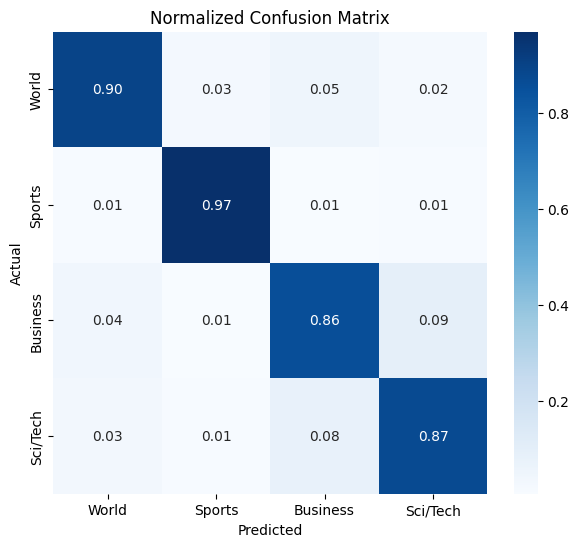

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels_text = ["World", "Sports", "Business", "Sci/Tech"]

plt.figure(figsize=(7,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels_text, yticklabels=labels_text)
plt.title("Normalized Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## نمودار مقایسه معیارها
نمودار میله‌ای برای مقایسه Accuracy، Precision، Recall و F1-score


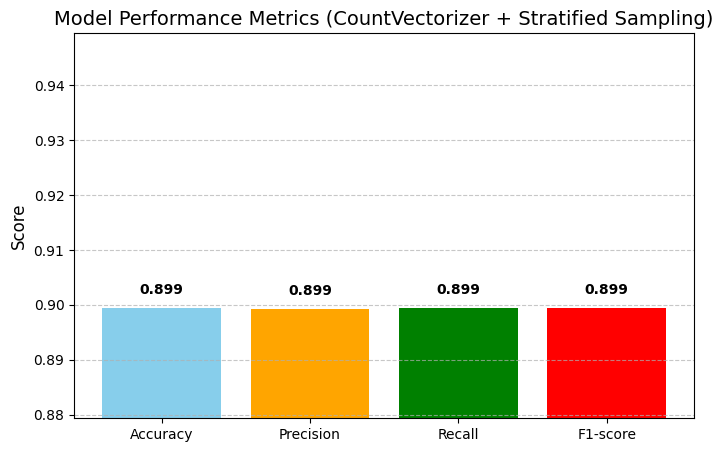

In [12]:
metrics_values = [acc, prec, rec, f1]
metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
y_min = min(metrics_values) - 0.02  
y_max = max(metrics_values) + 0.05 
plt.ylim(y_min, y_max)

colors = ['skyblue', 'orange', 'green', 'red']
bars = plt.bar(metrics_names, metrics_values, color=colors)

for bar, value in zip(bars, metrics_values):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        value + 0.002, 
        f"{value:.3f}", 
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Model Performance Metrics (CountVectorizer + Stratified Sampling)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## پیش‌بینی متن جدید
می‌توانیم یک متن دلخواه وارد کنیم و مدل پیش‌بینی کند که به کدام کلاس تعلق دارد.
همچنین احتمال تعلق متن به هر کلاس نمایش داده می‌شود.


In [14]:
new_text = ["The stock market reacted positively to the new economic policy"]
new_vec = vectorizer.transform(new_text)
prediction = model.predict(new_vec)
classes = ["World", "Sports", "Business", "Sci/Tech"]
proba = model.predict_proba(new_vec)[0]  # یک بعدی کردن آرایه

for cls, p in zip(classes, proba):
    print(f"{cls}: {p*100:.2f}%")


World: 0.08%
Sports: 0.00%
Business: 99.89%
Sci/Tech: 0.03%
